<a href="https://colab.research.google.com/github/mchecanu/Topological_ferroelectrics/blob/main/Autonomous%20recognition%20of%20topological%20structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#By Yongtao Liu

In [ ]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


In [ ]:
# PFM data
!gdown -q https://drive.google.com/uc?id=1IeSdqUG-hCgFJ86p8Ko4kByrpUogjlP3

In [ ]:
import numpy as np
pfm = np.load("patches_base6_2.npz")
print(pfm.files)

['x_patches', 'y_patches', 'z_patches', 'rgb_patches', 'beta_patches', 'alpha_patches', 'valid_xy', 'digital6']


In [ ]:
cut_index = 40
alpha_patch = pfm["alpha_patches"][:, cut_index:-cut_index, cut_index:-cut_index]
beta_patch= pfm["beta_patches"][:, cut_index:-cut_index, cut_index:-cut_index]
rgb_patch = pfm["rgb_patches"][:, cut_index:-cut_index, cut_index:-cut_index]

digital = pfm["digital6"]

print(alpha_patch.shape, beta_patch.shape, rgb_patch.shape, digital.shape)

(30, 70, 70) (30, 70, 70) (30, 70, 70, 3) (30,)


In [ ]:
images = rgb_patch.reshape(alpha_patch.shape[0], -1) #images

labels = digital # labels

labels = labels.astype(np.float64)
images = images.astype(np.float64)
print(images.shape); print(labels.shape)

(30, 14700)
(30,)


In [ ]:
from sklearn.model_selection import train_test_split


images_train, images_test, labels_train, labels_test = train_test_split(
    images, labels, test_size=0.2, random_state=2, stratify=labels
)

print("Training set shapes:", images_train.shape, labels_train.shape)
print("Testing set shapes:", images_test.shape, labels_test.shape)
print(labels_train)
print(labels_test)

Training set shapes: (18, 14700) (18,)
Testing set shapes: (12, 14700) (12,)
[3. 5. 5. 4. 3. 2. 4. 4. 0. 0. 3. 5. 2. 1. 2. 1. 1. 0.]
[3. 2. 5. 1. 0. 5. 4. 2. 1. 4. 3. 0.]


In [ ]:
import random

def add_noise(image, noise_level = 0.1):
  # Add random noise to the image
  noise = np.random.normal(0, noise_level, image.shape)  # Adjust standard deviation as needed
  noisy_image = image + noise
  noisy_image = np.clip(noisy_image, 0, 1) # Clip values to be within [0, 1]
  return noisy_image

images = images_train
labels = labels_train

train_images = []
train_labels = []

#Extend data
for i in range(len(images)):
    train_images.append(images[i])
    train_labels.append(labels[i])

# Add noise to the patches and extend the dataset
while len(train_images) < 1000:
  random_index = random.randint(0, len(images) -1)
  noisy_image = add_noise(images[random_index])
  train_images.append(noisy_image)
  train_labels.append(labels[random_index])

train_images = np.array(train_images).reshape(1000, -1)
train_labels = np.array(train_labels)

print(train_images.shape); print(train_labels.shape)

(1000, 14700)
(1000,)


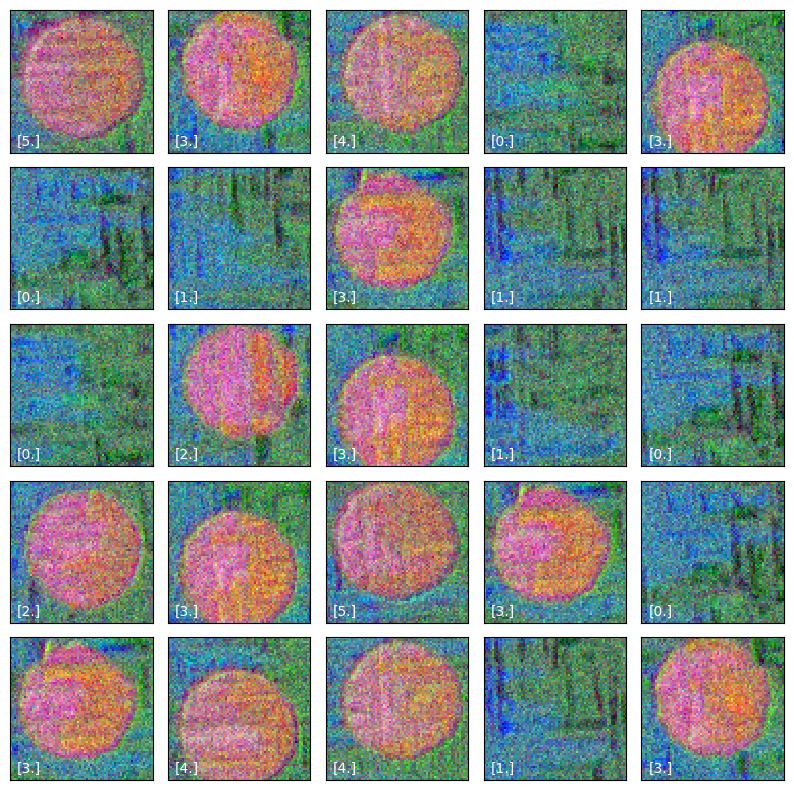

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 5, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for ax in axes.flat:
    i = np.random.randint(0, len(train_images), size=(1,))
    im = train_images[i]
    ax.imshow(im.reshape(150-2*cut_index,150-2*cut_index, 3), cmap='gnuplot', interpolation='nearest')
    ax.text(0.05, 0.05, str(train_labels[i]),
            transform=ax.transAxes, color='white')

In [ ]:
# gpc = GaussianProcessClassifier(kernel=RBF,
#         random_state=0).fit(train_images, train_labels)
# gpc.score(train_images, train_labels)

In [ ]:
# pred = gpc.predict(train_images)

In [ ]:
# plt.scatter(train_labels, pred)

In [ ]:
# index = 100
# print(train_labels[index:index + 10])
# print(pred[index:index + 10])

In [ ]:
images = images_test
labels = labels_test

test_images = []
test_labels = []

#Extend data
for i in range(len(images)):
    test_images.append(images[i])
    test_labels.append(labels[i])

# Add noise to the patches and extend the dataset to 3000 samples
while len(test_images) < 500:
  random_index = random.randint(0, len(images) -1)
  noisy_image = add_noise(images[random_index], noise_level=0.1)
  test_images.append(noisy_image)
  test_labels.append(labels[random_index])

test_images = np.array(test_images).reshape(500, -1)
test_labels = np.array(test_labels)

print(test_images.shape); print(test_labels.shape)

(500, 14700)
(500,)


In [ ]:
# gpc.score(test_images, test_labels)

In [ ]:
# pred = gpc.predict(test_images)

In [ ]:
# fig, axes = plt.subplots(5, 5, figsize=(10, 10),
#                          subplot_kw={'xticks':[], 'yticks':[]},
#                          gridspec_kw=dict(hspace=0.1, wspace=0.1))

# for ax in axes.flat:
#     i = np.random.randint(0, len(test_images), size=(1,))
#     im = test_images[i]
#     ax.imshow(im.reshape(150-2*cut_index,150-2*cut_index), cmap='gnuplot', interpolation='nearest')
#     ax.text(0.05, 0.05, str(pred[i]),
#             transform=ax.transAxes, color='white')

# More classifier models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(train_images, train_labels)
pred_labels = tree.predict(test_images)
print("Accuracy:", accuracy_score(test_labels, pred_labels))
print(classification_report(test_labels, pred_labels))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix:\n", cm)

Accuracy: 0.548
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85        76
         1.0       0.86      0.95      0.90        83
         2.0       0.58      0.32      0.41        78
         3.0       0.56      0.34      0.42        95
         4.0       0.35      0.27      0.31        74
         5.0       0.32      0.65      0.43        94

    accuracy                           0.55       500
   macro avg       0.61      0.55      0.55       500
weighted avg       0.60      0.55      0.55       500

Confusion Matrix:
 [[57  7  1  0  0 11]
 [ 1 79  0  0  0  3]
 [ 0  0 25  8  7 38]
 [ 0  0  4 32 26 33]
 [ 0  0  5  2 20 47]
 [ 0  6  8 15  4 61]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(train_images, train_labels)

pred_labels = model.predict(test_images)
print("Accuracy:", accuracy_score(test_labels, pred_labels))
print(classification_report(test_labels, pred_labels))

cm = confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix:\n", cm)

Accuracy: 0.886
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00        83
         2.0       0.74      1.00      0.85        78
         3.0       0.86      0.96      0.91        95
         4.0       1.00      0.49      0.65        74
         5.0       0.85      0.84      0.84        94

    accuracy                           0.89       500
   macro avg       0.91      0.88      0.88       500
weighted avg       0.90      0.89      0.88       500

Confusion Matrix:
 [[76  0  0  0  0  0]
 [ 0 83  0  0  0  0]
 [ 0  0 78  0  0  0]
 [ 0  0  0 91  0  4]
 [ 0  0 28  0 36 10]
 [ 0  0  0 15  0 79]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_images, train_labels)
pred_labels = knn.predict(test_images)
print("Accuracy:", accuracy_score(test_labels, pred_labels))
print(classification_report(test_labels, pred_labels))

cm = confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix:\n", cm)

Accuracy: 0.502
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00        83
         2.0       0.22      0.62      0.32        78
         3.0       0.00      0.00      0.00        95
         4.0       0.00      0.00      0.00        74
         5.0       0.37      0.47      0.41        94

    accuracy                           0.50       500
   macro avg       0.43      0.51      0.46       500
weighted avg       0.42      0.50      0.45       500

Confusion Matrix:
 [[76  0  0  0  0  0]
 [ 0 83  0  0  0  0]
 [ 0  0 48  0  0 30]
 [ 0  0 50  0  0 45]
 [ 0  0 74  0  0  0]
 [ 0  0 50  0  0 44]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel= 'rbf')
svm.fit(train_images, train_labels)
pred_labels = svm.predict(test_images)

print("Accuracy:", accuracy_score(test_labels, pred_labels))
print(classification_report(test_labels, pred_labels))

cm = confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix:\n", cm)

Accuracy: 0.808
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00        83
         2.0       1.00      1.00      1.00        78
         3.0       1.00      0.52      0.68        95
         4.0       0.60      0.99      0.74        74
         5.0       0.49      0.48      0.48        94

    accuracy                           0.81       500
   macro avg       0.85      0.83      0.82       500
weighted avg       0.84      0.81      0.80       500

Confusion Matrix:
 [[76  0  0  0  0  0]
 [ 0 83  0  0  0  0]
 [ 0  0 78  0  0  0]
 [ 0  0  0 49  0 46]
 [ 0  0  0  0 73  1]
 [ 0  0  0  0 49 45]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, max_depth=6)
forest.fit(train_images, train_labels)
pred_labels = forest.predict(test_images)

print("Accuracy:", accuracy_score(test_labels, pred_labels))
print(classification_report(test_labels, pred_labels))

cm = confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix:\n", cm)

KeyboardInterrupt: 

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_images, train_labels)
pred_labels = nb.predict(test_images)

print("Accuracy:", accuracy_score(test_labels, pred_labels))
print(classification_report(test_labels, pred_labels))

cm = confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix:\n", cm)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5)
gb.fit(train_images, train_labels)
pred_labels = gb.predict(test_images)

print("Accuracy:", accuracy_score(test_labels, pred_labels))
print(classification_report(test_labels, pred_labels))

cm = confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix:\n", cm)